In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

=== Basic Data Analysis Tool ===
Enter the path to your CSV file: 
Error: [Errno 2] No such file or directory: ''
Would you like to try again? (yes/no): yes
Enter the path to your CSV file: 
Error: [Errno 2] No such file or directory: ''
Would you like to try again? (yes/no): yes
Enter the path to your CSV file: "C:\Users\lata6\anaconda3\pkgs\scikit-learn-1.2.1-py310hd77b12b_0\Lib\site-packages\sklearn\datasets\data\iris.csv"

Dataset loaded successfully!

Preview of the dataset:
   150    4  setosa  versicolor  virginica
0  5.1  3.5     1.4         0.2          0
1  4.9  3.0     1.4         0.2          0
2  4.7  3.2     1.3         0.2          0
3  4.6  3.1     1.5         0.2          0
4  5.0  3.6     1.4         0.2          0

Available columns for analysis:
['150', '4', 'setosa', 'versicolor', 'virginica']
Enter the column name for analysis: setosa

Analyzing column: setosa

Mean: 3.7580000000000005
Median: 4.35
Mode: 1.4


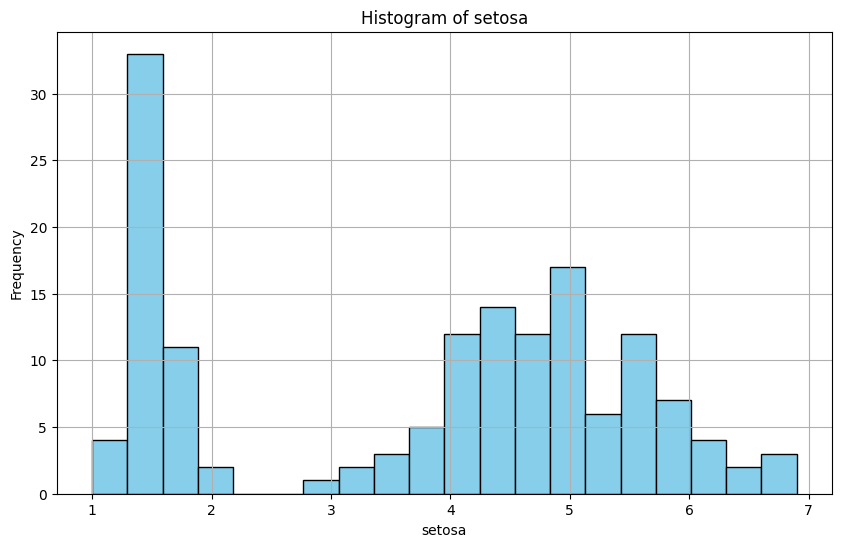

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_csv():
    """
    Prompt the user to input the file path for the CSV file and load it.
    Handles errors and shows a preview of the dataset.
    """
    while True:
        file_path = input("Enter the path to your CSV file: ").strip().strip('"')
        try:
            data = pd.read_csv(file_path)
            print("\nDataset loaded successfully!\n")
            print("Preview of the dataset:")
            print(data.head())
            return data
        except Exception as e:
            print(f"Error: {e}")
            retry = input("Would you like to try again? (yes/no): ").strip().lower()
            if retry != 'yes':
                return None

def analyze_column(data):
    """
    Allow the user to select a column for analysis and compute mean, median, and mode.
    """
    print("\nAvailable columns for analysis:")
    print(list(data.columns))
    
    while True:
        column_name = input("Enter the column name for analysis: ").strip()
        if column_name not in data.columns:
            print(f"Column '{column_name}' not found in the dataset. Try again.")
        else:
            break
    
    values = data[column_name].dropna()
    if not np.issubdtype(values.dtype, np.number):
        print(f"The selected column '{column_name}' is not numeric. Cannot perform analysis.")
        return
    
    print(f"\nAnalyzing column: {column_name}\n")
    mean_val = np.mean(values)
    median_val = np.median(values)
    mode_val = values.mode().iloc[0] if not values.mode().empty else None
    
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    return column_name, values

def visualize_data(column_name, values):
    """
    Create a histogram to visualize the selected column's data distribution.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(values, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    print("=== Basic Data Analysis Tool ===")
    
    # Step 1: Load dataset
    data = load_csv()
    if data is None:
        print("Exiting the program. Please provide a valid dataset next time.")
    else:
        # Step 2: Perform analysis
        result = analyze_column(data)
        if result:
            column_name, values = result
            
            # Step 3: Visualize the results
            visualize_data(column_name, values)
